In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import statsmodels.api as sm  
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
from random import uniform
from scipy.stats import  randint as sp_randint
import urllib.request
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"C:\Users\vaide\OneDrive\Desktop\marketing_campaign.xlsx", sheet_name='Sheet1')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.shape # printing the shape of dataset
data.dtypes # printing datatypes of all the dataset variables
data.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data = data.drop(['ID','Dt_Customer','Z_CostContact','Z_Revenue','AcceptedCmp3',
                  'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'], axis=1)

In [7]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


In [8]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

[Text(0.5, 1.0, 'Boxplot for Income')]

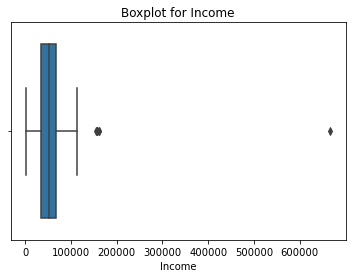

In [9]:
sns.boxplot(x='Income', data=data).set(title='Boxplot for Income')

[Text(0.5, 1.0, 'Histogram for Income')]

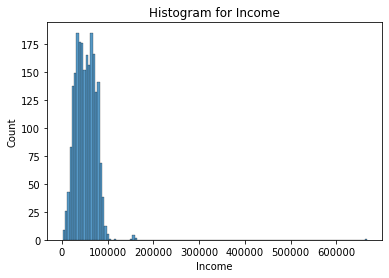

In [10]:
sns.histplot(data=data, x="Income").set(title='Histogram for Income')

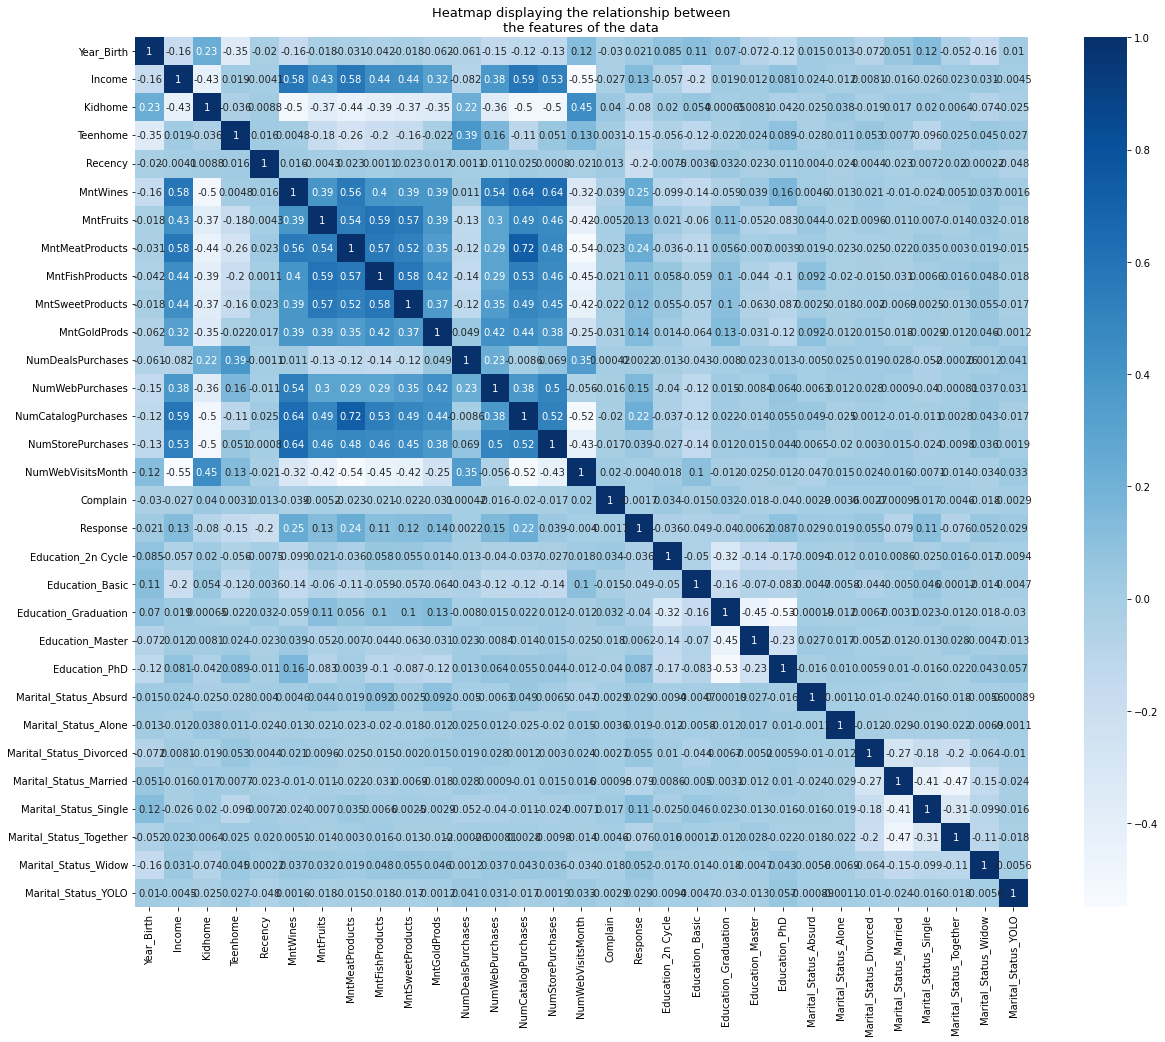

In [69]:
# Visualization of the correlation between the features
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()


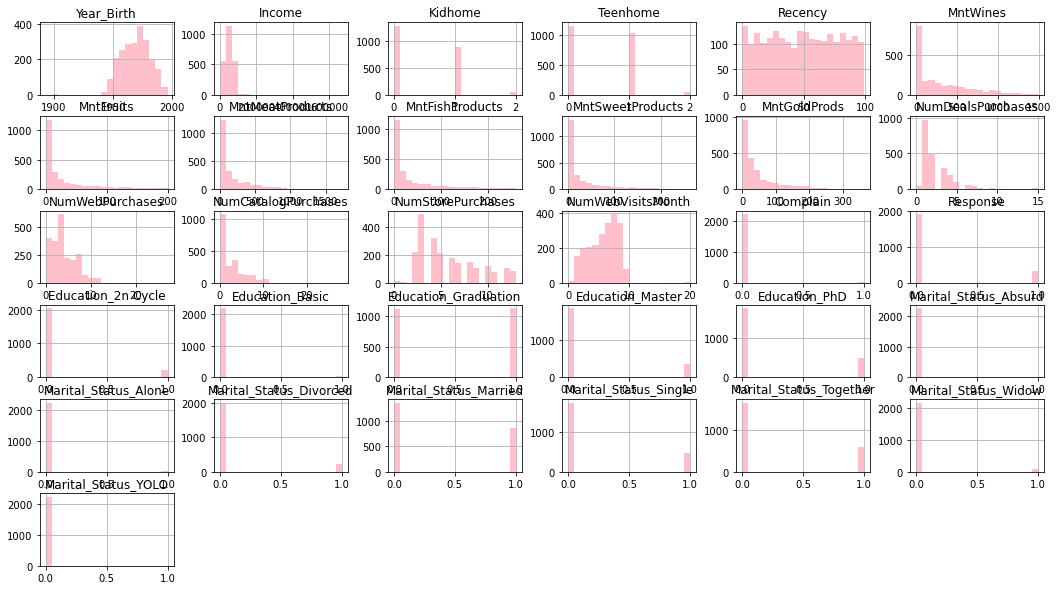

In [72]:
data.hist(figsize=(18,10),bins=20, color="pink")
plt.show()

In [11]:
data["Income"] = data["Income"].fillna(data["Income"].median())
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [18]:
data=pd.get_dummies(data)

In [19]:
data

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [20]:
data.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

# Logistic Regression Model

In [21]:
X = data.drop(['Response'], axis=1)
Y = data["Response"]
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [22]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [23]:
X_Col = X.columns
X_Col

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [25]:
X = pd.DataFrame(SC.fit_transform(X))
X.columns = X.columns.values
X.index = X.index.values

In [26]:
X.columns = X_Col
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894
2236,-1.903435,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
2237,1.017761,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,...,-0.444816,-0.526385,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894
2238,-1.068807,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,...,2.248122,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894


In [27]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
#Logit_Model = sm.Logit(Y_Train,X_Train).fit()
#print(Logit_Model.summary())
Log_Model = LogisticRegression()
Log_Model.fit(X_Train, Y_Train)
Y_Pred = Log_Model.predict(X_Test)

In [57]:
mode = sm.OLS(Y_Train, X_Train).fit()

In [58]:
print(mode.summary())

                                 OLS Regression Results                                
Dep. Variable:               Response   R-squared (uncentered):                   0.167
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              12.64
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                    2.76e-52
Time:                        22:02:19   Log-Likelihood:                         -628.36
No. Observations:                1792   AIC:                                      1313.
Df Residuals:                    1764   BIC:                                      1466.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [29]:
CM = confusion_matrix(Y_Test, Y_Pred)
CM

array([[357,  11],
       [ 57,  23]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       368
           1       0.68      0.29      0.40        80

    accuracy                           0.85       448
   macro avg       0.77      0.63      0.66       448
weighted avg       0.83      0.85      0.82       448



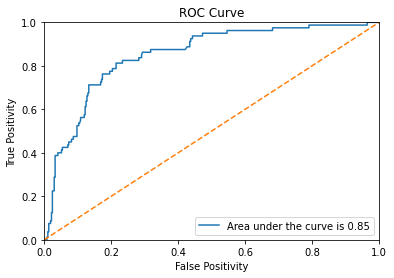

Accuracy of the model is 84.82142857142857 %


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

Y_Prob = Log_Model.predict_proba(X_Test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_Test,  Y_Prob)
auc = metrics.roc_auc_score(Y_Test, Y_Prob)

#create ROC curve
plt.figure()
#plt.plot(fpr,tpr,label="Area under the curve is " +str(auc))
plt.plot(fpr,tpr,label="Area under the curve is %0.2f" % auc)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positivity')
plt.xlabel('False Positivity')
plt.legend(loc=4)
plt.show()
print("Accuracy of the model is", metrics.accuracy_score(Y_Test, Y_Pred)*100,'%')

In [32]:
print("Accuracy of the model is", metrics.accuracy_score(Y_Test, Y_Pred)*100,'%')

Accuracy of the model is 84.82142857142857 %


# Support Vector Machine Model

In [33]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
from sklearn.svm import SVC
Model_SVM = SVC(C=10, kernel='rbf', probability=True)
Model_SVM.fit(X_Train, Y_Train)

SVC(C=10, probability=True)

In [35]:
Y_Pred = Model_SVM.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_Pred)
CM

array([[356,  12],
       [ 47,  33]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       368
           1       0.73      0.41      0.53        80

    accuracy                           0.87       448
   macro avg       0.81      0.69      0.73       448
weighted avg       0.86      0.87      0.85       448



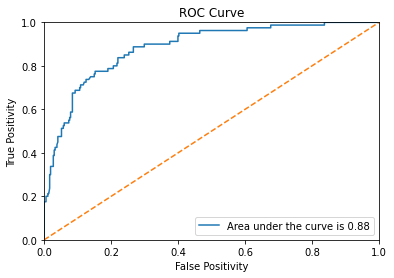

Accuracy of the model is 86.83035714285714 %


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

Y_Prob = Model_SVM.predict_proba(X_Test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_Test,  Y_Prob)
auc = metrics.roc_auc_score(Y_Test, Y_Prob)

#create ROC curve
plt.figure()
#plt.plot(fpr,tpr,label="Area under the curve is " +str(auc))
plt.plot(fpr,tpr,label="Area under the curve is %0.2f" % auc)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positivity')
plt.xlabel('False Positivity')
plt.legend(loc=4)
plt.show()
print("Accuracy of the model is", metrics.accuracy_score(Y_Test, Y_Pred)*100,'%')

In [38]:
print("Accuracy of the model is", metrics.accuracy_score(Y_Test, Y_Pred)*100,'%')

Accuracy of the model is 86.83035714285714 %


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics

In [47]:
tModel = DecisionTreeClassifier(max_depth=3)
tModel.fit(X_Train,Y_Train)

DecisionTreeClassifier(max_depth=3)

In [50]:
yDPred = tModel.predict(X_Test)
print(metrics.confusion_matrix(Y_Test, tModel.predict(X_Test)))

[[362   6]
 [ 66  14]]


In [52]:
print('Accuracy: '+str(round(accuracy_score(Y_Test, yDPred)*100,2))+'%')
print('Precision: '+str(round(precision_score(Y_Test, yDPred)*100,2))+'%')
print('Recall: '+str(round(recall_score(Y_Test, yDPred)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(Y_Test, yDPred)*100,2))+'%')

Accuracy: 83.93%
Precision: 70.0%
Recall: 17.5%
MSE: 16.07%


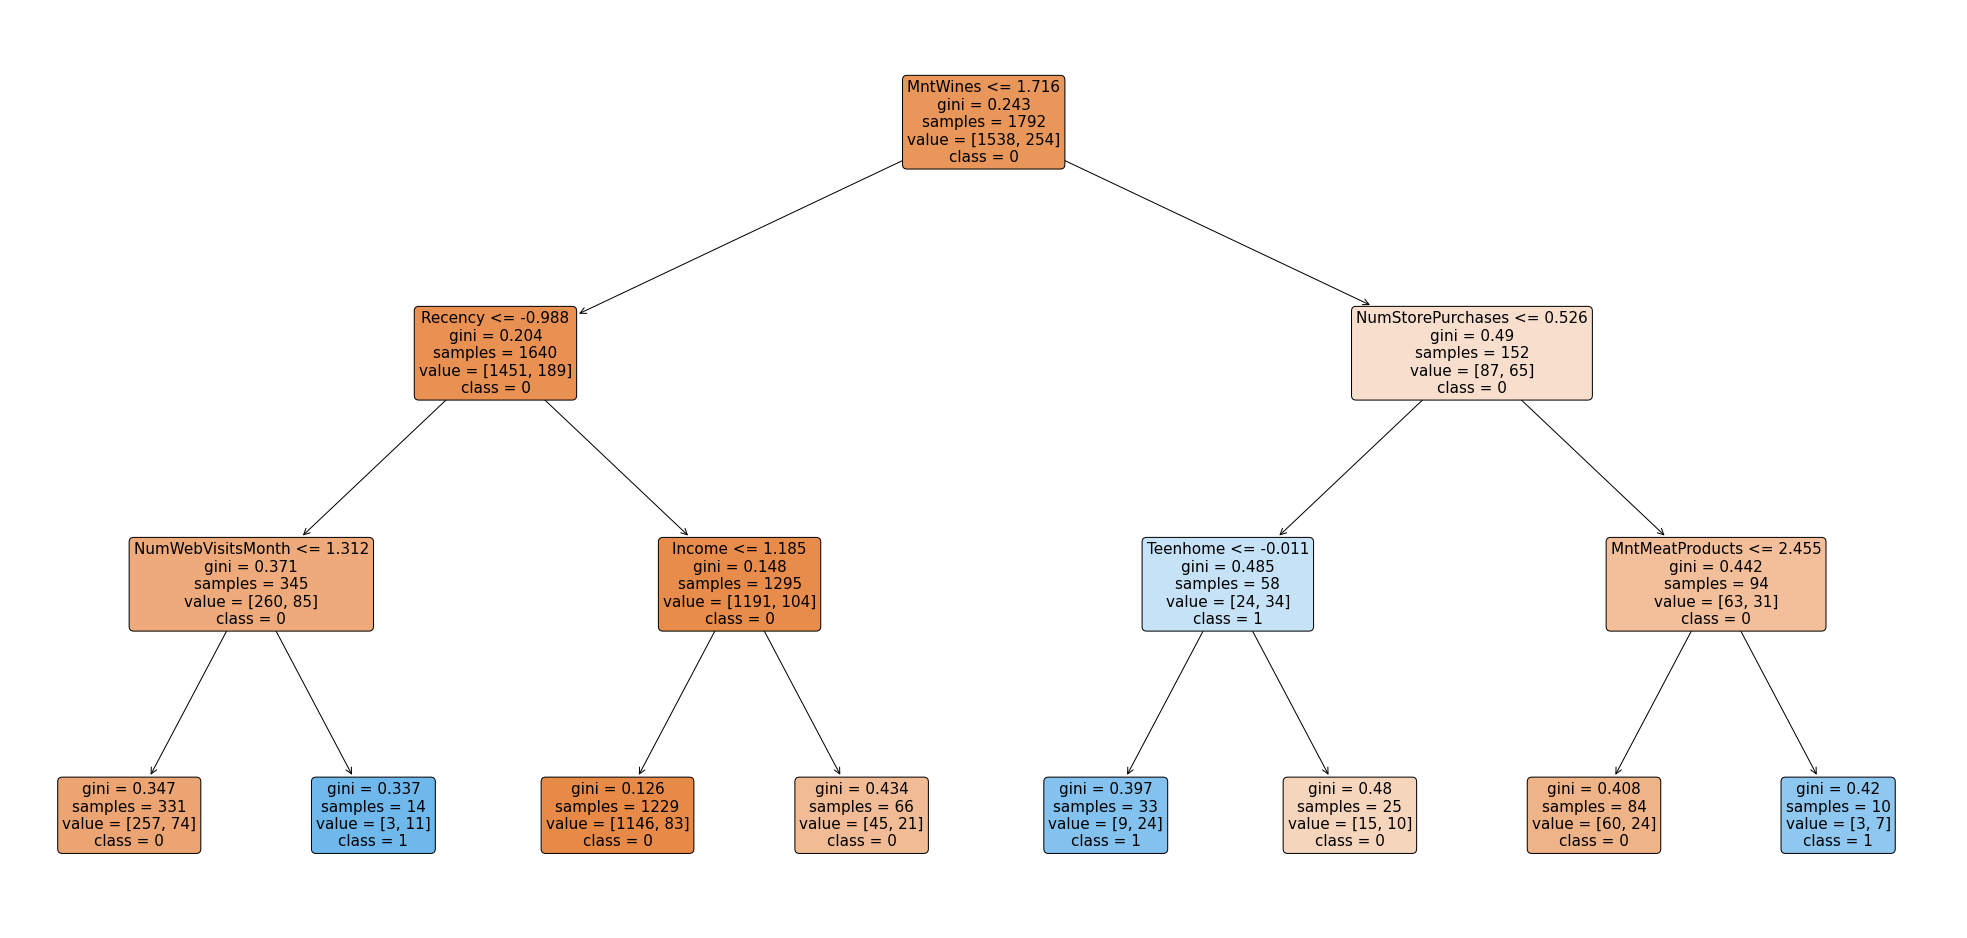

In [53]:
plt.figure(figsize=(35,17))
feature_names = X.columns.values.tolist()
target_names = ['0','1']

tree.plot_tree(tModel, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.savefig('DecisionTreeChocolate.png') 

In [55]:
print("Classification report - \n", classification_report(Y_Test,yDPred))

Classification report - 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       368
           1       0.70      0.17      0.28        80

    accuracy                           0.84       448
   macro avg       0.77      0.58      0.59       448
weighted avg       0.82      0.84      0.80       448

